# Project 2

# Problem Statement : Predicting Customer Churn in the Telecom Industry

In [1]:
# Importing Python Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## A) Importing Required Data 

In [2]:
telecom_data = pd.read_csv('D:/Data_Science/Board Infinity/Session 14022021/Project2/Project - 2 Data (Telco Churn Data).csv')

In [3]:
telecom_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telecom_data.shape

(7043, 21)

In [5]:
pd.set_option('display.max_columns',21)

In [6]:
# """Total Columns in Data"""
telecom_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# B) Performing E.D.A

In [7]:
# Finding the Numerical features & Categorical features in data.
# """ Checking Data types of all Columns."""
telecom_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Convering Total charges column to float data type
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')


## Separiting Numerical Features & Categorical Features

## Extracting Numerical Features

In [9]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
'''Extraxting Numerical Features'''
numerical_features = [ feature for feature in telecom_data.columns if ((telecom_data[feature].dtypes != 'O') & ( feature not in ['Churn']))]
    

In [11]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
# Analysis of Numerical Features
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
telecom_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [14]:
# checking the outliers

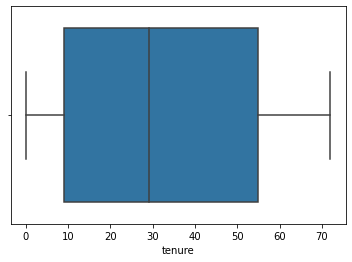

In [15]:
# checking the outliers in tenure
sns.boxplot(telecom_data['tenure'] , data = telecom_data)


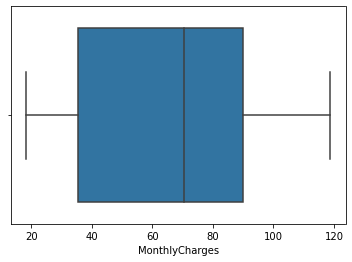

In [16]:
# checking the outliers in Monthly Charges
sns.boxplot(telecom_data['MonthlyCharges'] , data = telecom_data)

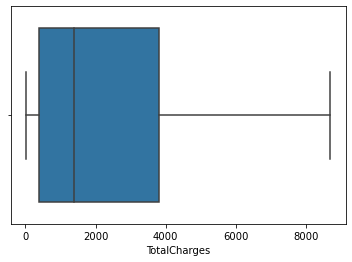

In [17]:
# checking the outliers in Total Charges
sns.boxplot(telecom_data['TotalCharges'] , data = telecom_data)

In [18]:
# No Outliers in tenure & Monthly charges

### Ploting Numerical features W.R.T Target variable

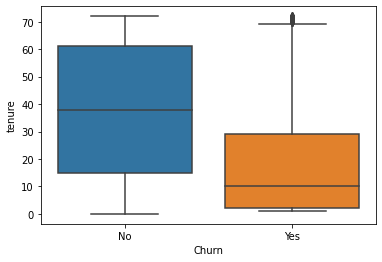

In [19]:
# checking the outliers in tenure
sns.boxplot(x = 'Churn',y = 'tenure' , data = telecom_data)

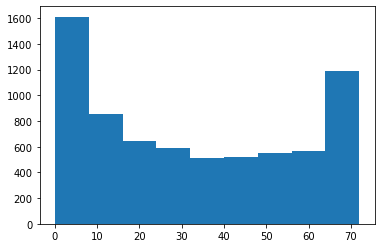

In [20]:
plt.hist(telecom_data['tenure'],bins = 9)
plt.show()


#### Box plot shows us that customer with tenure between 15 - 60 months are preferred to not churn.
#### Customer with tenure between 5 to 30 months are churns.
#### Count of customer with 0-9 tenure is high.

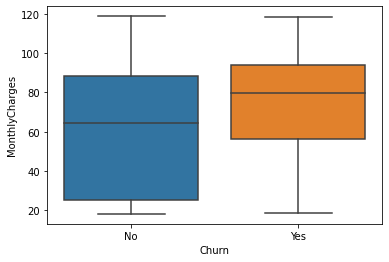

In [21]:
# checking the outliers in Monthly Charges
sns.boxplot(x = 'Churn',y = 'MonthlyCharges' , data = telecom_data)

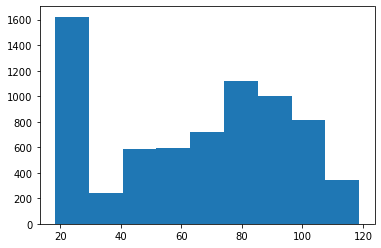

In [22]:
plt.hist(telecom_data['MonthlyCharges'],bins =9)
plt.show()

#### Output from Monthly cgharges analysis
#### 50% of customers are within monthly charges of 25 - 85. Are like to not curn.
#### 50% of customers are within monthly charges of 60-90. Are like to curn.
#### Customers with monthly charges 0 - 29 are high in no.

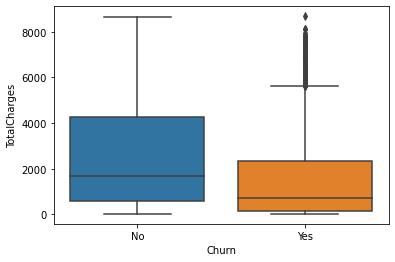

In [23]:
# checking the outliers in Total Charges
sns.boxplot(x = 'Churn',y = 'TotalCharges' , data = telecom_data)

C:\Users\Pankaj9\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pankaj9\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


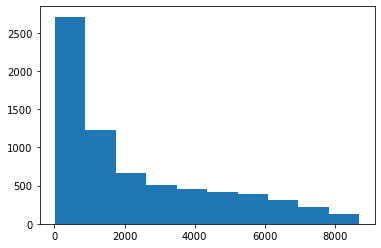

In [24]:
plt.hist(telecom_data['TotalCharges'],bins =10)
plt.show()

#### Output from Monthly cgharges analysis
#### 50% of customers are within Total charges of 500 - 4000. Are like to not curn.
#### 50% of customers are within Total charges of 300-2000. Are like to curn.

In [25]:
### Checking Participation Senior citizon into churning preference

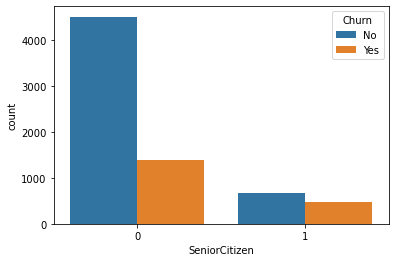

In [26]:
# 1 shows customers are senior citizons.
# 0 shows customers are not senior citizons. 
sns.countplot(x='SeniorCitizen', hue = 'Churn',data = telecom_data)

#### Count plot shows that less no. of senior citizon customers are associated with company.
#### No. of senior citizon customers are not like to churn is high but senior citizens who like to churn are in considerable no.

## Extracting Categorical Features

In [27]:
'''Extraxting Categorical Features'''
categorical_features = [ feature for feature in telecom_data.columns if ((telecom_data[feature].dtypes == 'O') & ( feature not in ['Churn']))]

In [28]:
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [29]:
list(enumerate(categorical_features))
plotno_odd = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
plotno_even = [2,4,6,8,10,12,16,18,20,22,24,26,28,30,32]

#### 1.Gender Plot

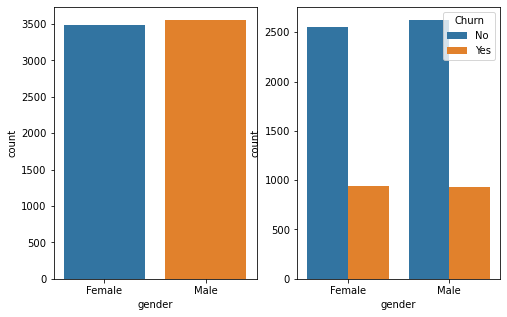

In [30]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x = 'gender',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'gender',hue = 'Churn', data=telecom_data)

In [31]:
telecom_data.groupby('gender')['gender'].count()

gender
Female    3488
Male      3555
Name: gender, dtype: int64

In [32]:
telecom_data.groupby(['gender','Churn'])['gender'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: gender, dtype: int64

In [33]:
#### No. of Customers from male & female are approximately equal.
#### less no. customers are like churn from both gender. 

#### 2.Partner

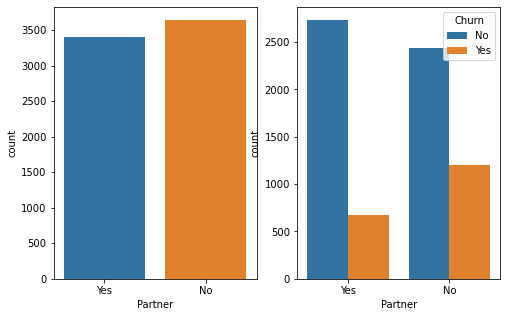

In [34]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Partner',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'Partner',hue = 'Churn', data=telecom_data)


In [35]:
telecom_data.groupby('Partner')['Partner'].count()

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

In [36]:
telecom_data.groupby(['Partner','Churn'])['Partner'].count()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Partner, dtype: int64

#### 3.Dependents

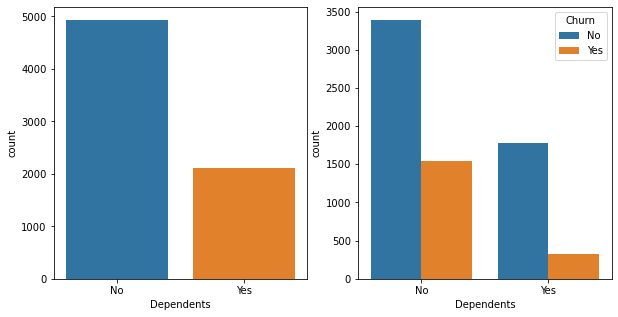

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Dependents',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'Dependents',hue = 'Churn', data=telecom_data)

In [38]:
telecom_data.groupby('Dependents')['Partner'].count()

Dependents
No     4933
Yes    2110
Name: Partner, dtype: int64

In [39]:
telecom_data.groupby(['Dependents','Churn'])['Partner'].count()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Partner, dtype: int64

#### 4.Phone Services

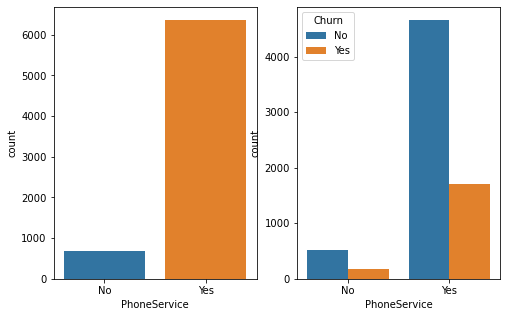

In [40]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x = 'PhoneService',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'PhoneService',hue = 'Churn', data=telecom_data)

In [41]:
telecom_data.groupby('PhoneService')['Partner'].count()

PhoneService
No      682
Yes    6361
Name: Partner, dtype: int64

In [42]:
telecom_data.groupby(['PhoneService','Churn'])['Partner'].count()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Partner, dtype: int64

In [43]:
### Customers with Phone Services are in high no.
### Verly less costumers hvae no phone Services.

#### 5. MultipleLines

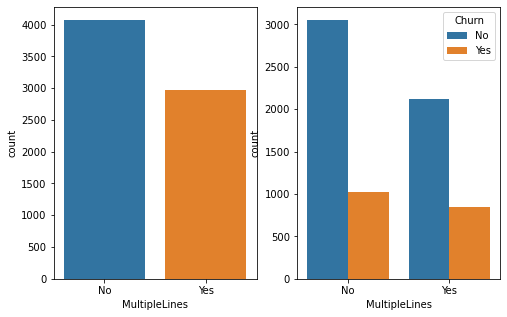

In [44]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x = 'MultipleLines',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'MultipleLines',hue = 'Churn', data=telecom_data)

In [45]:
 telecom_data.groupby(['MultipleLines'])['Partner'].count()

MultipleLines
No     4072
Yes    2971
Name: Partner, dtype: int64

In [46]:
telecom_data.groupby(['MultipleLines','Churn'])['Partner'].count()

MultipleLines  Churn
No             No       3053
               Yes      1019
Yes            No       2121
               Yes       850
Name: Partner, dtype: int64

In [47]:
### Customers with multiplelines are less in no. compare to Customers with Multiplelines.
### Customers with multiple lines are churn more compare to Customer without multiple lines.

### 6. InternetService , OnlineSecurity ,OnlineBackup ,DeviceProtection,TechSupport,StreamingTV,StreamingMovies

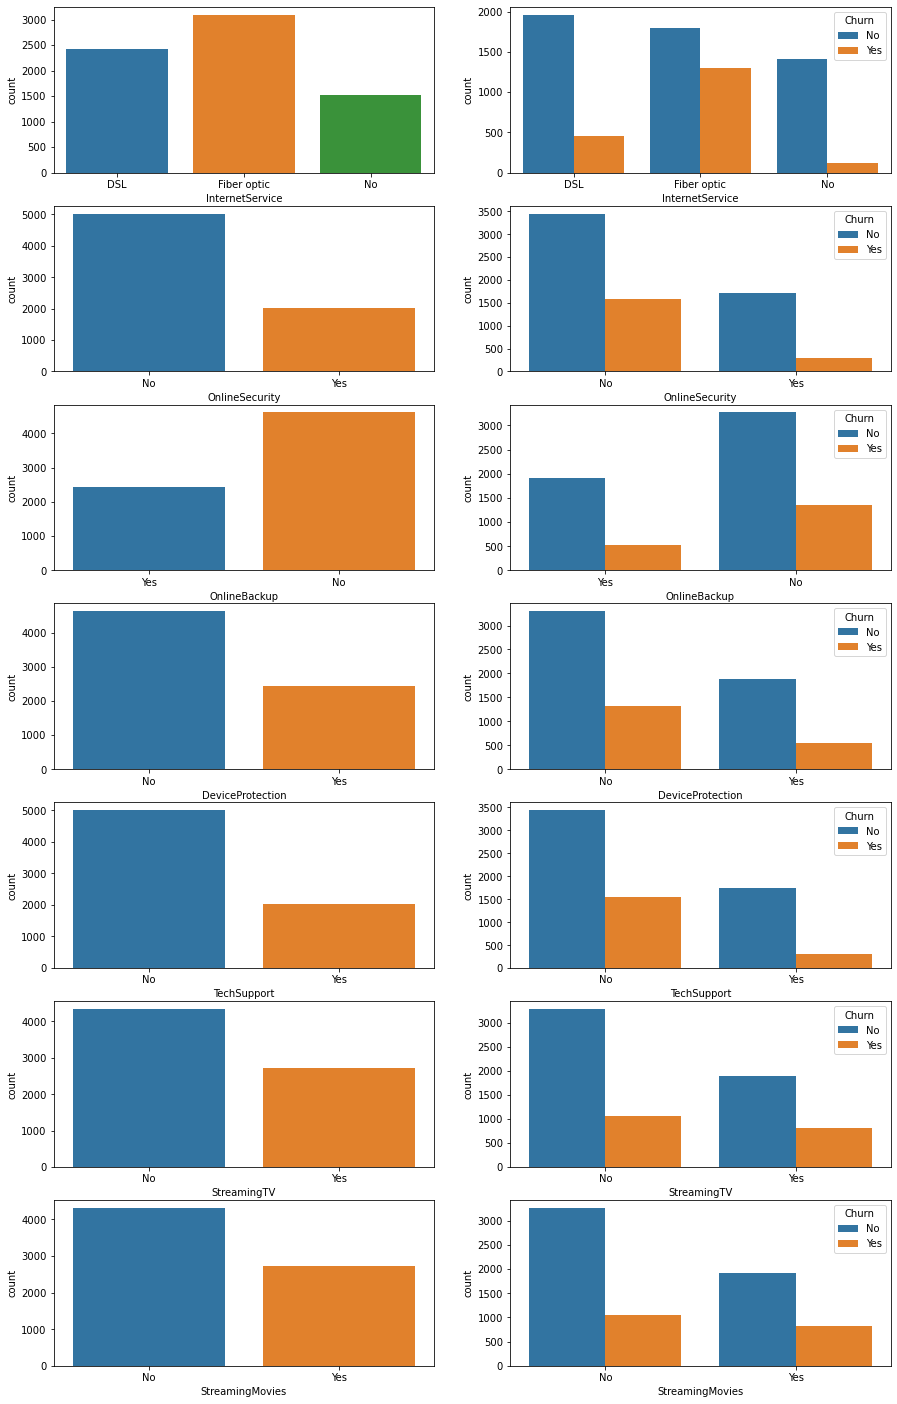

In [48]:
#Internet Service
plt.figure(figsize=(15,25))
plt.subplot(7,2,1)
sns.countplot(x = 'InternetService',data=telecom_data)
plt.subplot(7,2,2)
sns.countplot(x = 'InternetService',hue = 'Churn', data=telecom_data)
# Online Security
plt.subplot(7,2,3)
sns.countplot(x = 'OnlineSecurity',data=telecom_data)
plt.subplot(7,2,4)
sns.countplot(x = 'OnlineSecurity',hue = 'Churn', data=telecom_data)
#Online Backup
plt.subplot(7,2,5)
sns.countplot(x = 'OnlineBackup',data=telecom_data)
plt.subplot(7,2,6)
sns.countplot(x = 'OnlineBackup',hue = 'Churn', data=telecom_data)
#Device Protection
plt.subplot(7,2,7)
sns.countplot(x = 'DeviceProtection',data=telecom_data)
plt.subplot(7,2,8)
sns.countplot(x = 'DeviceProtection',hue = 'Churn', data=telecom_data)
#Tech Support
plt.subplot(7,2,9)
sns.countplot(x = 'TechSupport',data=telecom_data)
plt.subplot(7,2,10)
sns.countplot(x = 'TechSupport',hue = 'Churn', data=telecom_data)
#Streaming TV
plt.subplot(7,2,11)
sns.countplot(x = 'StreamingTV',data=telecom_data)
plt.subplot(7,2,12)
sns.countplot(x = 'StreamingTV',hue = 'Churn', data=telecom_data)
# Streaming Movies
plt.subplot(7,2,13)
sns.countplot(x = 'StreamingMovies',data=telecom_data)
plt.subplot(7,2,14)
sns.countplot(x = 'StreamingMovies',hue = 'Churn', data=telecom_data)

In [49]:
### INTERNET SERVICE
### Telecom company provides two types internet service a) DSL B) Fiber Optic
### AS per graph max no. of customer are selected fiber optic internet service compair to DSl.
### Customers with fiber optic service are churning more compair to other.

### ONLINE SECURITY SERVICE
### Less no. of customers have Online Security service & less no. of customers are churned.

### ONLINE BACKUP
### Less no. of customers have Online Backup service & less no. of customers are churned.

### DEVICE PROTECTION
### Less no. of customers have choosen Device protection service.
### Churning ratio is approx same in customers with online Device Protection & customers without Online Device Protection.

### TECH SUPPORT
### Less no. of customers have tech support.
### less no. of customers are churned which have tech support.

### STREAMING TV
### less no. of customer are using Streaming TV service.
### Ratio of customers are churning approximately equal.

### STREAMING MOVIES
### Less no of customers are using Streaming movies sevice.
### Ratio of customers are churning approximately equal.

### 7. Contract

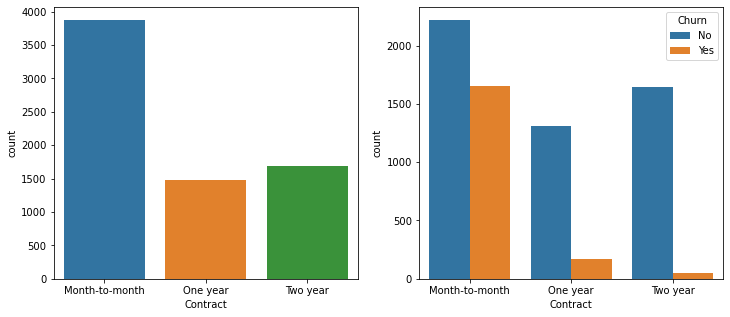

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Contract',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'Contract',hue = 'Churn', data=telecom_data)

In [51]:
telecom_data.groupby('Contract')['Contract'].count()

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64

In [52]:
telecom_data.groupby(['Contract','Churn'])['Contract'].count()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Contract, dtype: int64

In [53]:
### Large no. of customers are preffered to do Month to Month contract.
### Customers with Month to Month contract have churned more.

### 8. PaperlessBilling

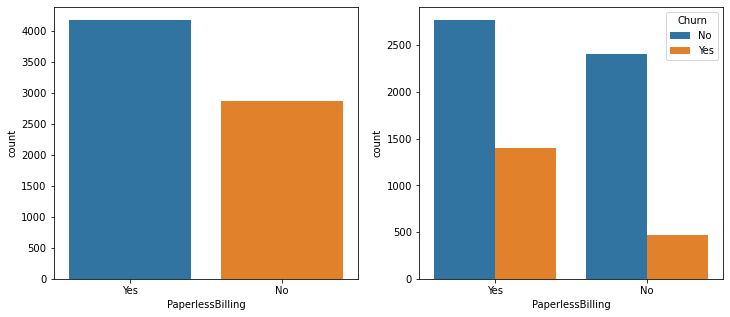

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'PaperlessBilling',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'PaperlessBilling',hue = 'Churn', data=telecom_data)

In [55]:
telecom_data.groupby('PaperlessBilling')['PaperlessBilling'].count()

PaperlessBilling
No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64

In [56]:
telecom_data.groupby(['PaperlessBilling','Churn'])['PaperlessBilling'].count()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: PaperlessBilling, dtype: int64

In [57]:
### Customers are preferred paperless billing.
### Customers who doing paperless billing are churned more.

### 9. PaymentMethod

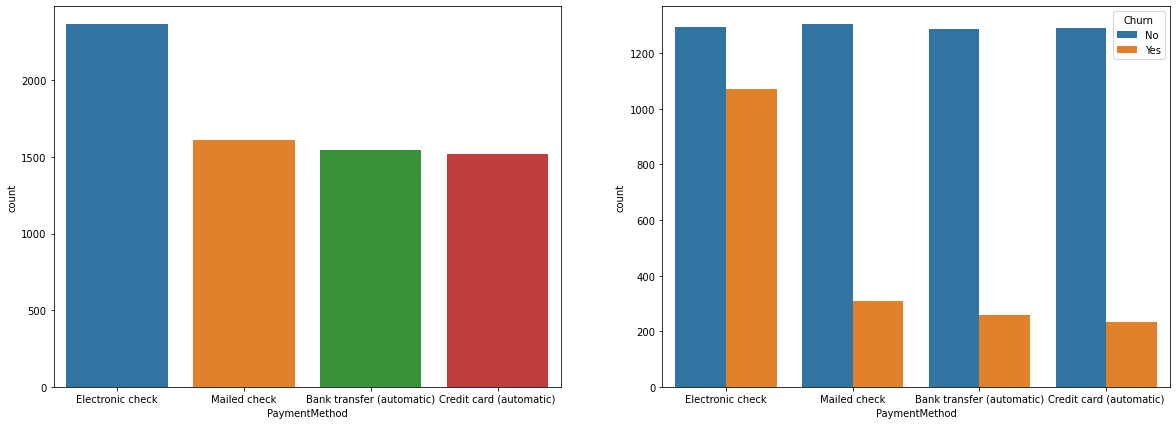

In [58]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = 'PaymentMethod',data=telecom_data)
plt.subplot(1,2,2)
sns.countplot(x = 'PaymentMethod',hue = 'Churn', data=telecom_data)

In [59]:
telecom_data.groupby('PaymentMethod')['PaymentMethod'].count()

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: int64

In [60]:
telecom_data.groupby(['PaymentMethod','Churn'])['PaymentMethod'].count()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: PaymentMethod, dtype: int64

In [61]:
### Electronic deck type payment is preffered compare to other types of payment.
### Churning ratio is also high in elctronic deck type payment.

## Feature Engineering.

Extracting Feature variables & Target Variable.

In [62]:
telecom_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [63]:
telecom_data.shape

(7043, 21)

### Checking the variables with missing values.

In [64]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [66]:
### Null values present in Total Charges.

### Finding Duplicate Rows in data

In [67]:
telecom_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [68]:
### Duplicate rows are nor presnt in data.

### Dropping unneccessary columns

In [69]:
# Dropping Customer Id column. Customer ID is primery so it did not help to model in predicting of customer churn.
# Dropping Gender column. Gender column have approximately same churning customers in male & female.
# Dropping Phone Services column.In this column have monopoly of customers which are using phoneservices.
# Dropping Streaming TV & Streaming movies.
# Dropping Total Charges column. because its colinear with tenure &monthly charges. 

telecom_data.shape

(7043, 21)

In [70]:
telecom_data1 = telecom_data.drop(['gender','customerID','StreamingTV','StreamingMovies','TotalCharges','PhoneService'],axis=1)

In [71]:
telecom_data1.shape

(7043, 15)

In [72]:
telecom_data1.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


## Splitting Dataset into Feature variable (X) & Target Variable (y)

In [73]:
telecom_data1.loc[telecom_data1.Churn=='Yes','Churn']=1
telecom_data1.loc[telecom_data1.Churn=='No','Churn']=0

In [74]:
telecom_data1

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,1


In [75]:
telecom_data1.shape

(7043, 15)

In [76]:
telecom_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB


In [77]:
X = telecom_data1.drop(['Churn'],axis=1)

In [78]:
y = telecom_data1['Churn']

In [79]:
y = y.astype('int')

In [80]:
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20
7040,0,Yes,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


### Performing One Hot Encoding & Converting Boolean Variables

In [81]:
# Performing One Hot Coding using Dummies
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [82]:
X = pd.get_dummies(X, columns =['Partner', 'Dependents','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True )

In [83]:
X

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,34,56.95,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
2,0,2,53.85,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,0,45,42.30,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,0,0,1,0,1,1,1,0,1,0,0,1
7039,0,72,103.20,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0
7040,0,11,29.60,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   Partner_Yes                            7043 non-null   uint8  
 4   Dependents_Yes                         7043 non-null   uint8  
 5   MultipleLines_Yes                      7043 non-null   uint8  
 6   InternetService_Fiber optic            7043 non-null   uint8  
 7   InternetService_No                     7043 non-null   uint8  
 8   OnlineSecurity_Yes                     7043 non-null   uint8  
 9   OnlineBackup_Yes                       7043 non-null   uint8  
 10  DeviceProtection_Yes                   7043 non-null   uint8  
 11  Tech

### Performing Scaling 

### Splitting data into Training & Testing 

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

## Model Building

### Model 1 = Logistic regresssion

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_regression =  LogisticRegression()

In [89]:
log_regression.fit(X_train,y_train)

C:\Users\Pankaj9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
log_regression.score(X_train,y_train)

0.8036511156186612

In [91]:
log_regression.score(X_test,y_test)

0.79649787032655

In [92]:
customer_churn_pred = log_regression.predict(X_test)

### Measuring Accuracy , Precision & Recall Logistic Regression Model

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
# Precision , Recall & F1_score
Classification_result = classification_report(y_test,customer_churn_pred)
print("Classification_result")
print(Classification_result)

Classification_result
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.64      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [95]:
# Calculating Accuracy
Accuracy = accuracy_score(y_test,customer_churn_pred)
print("Accuracy of Logistic Regression")
print(Accuracy)

Accuracy of Logistic Regression
0.79649787032655


### Model2 - Decision Tree Classification

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dtree_model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes =30,random_state=21)

In [133]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=30, random_state=21)

In [134]:
dtree_model.score(X_train,y_train)

0.8109533468559837

In [135]:
dtree_model.score(X_test,y_test)

0.7860861334595362

In [136]:
Customer_churn_pred2 = dtree_model.predict(X_test)

### Measuring Accuracy , Precision & Recall Decision Tree Model

In [137]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [138]:
# Precision , Recall & F1_score
Classification_result = classification_report(y_test,Customer_churn_pred2)
print("Classification_result")
print(Classification_result)

Classification_result
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [128]:
# Calculating Accuracy
Accuracy = accuracy_score(y_test,Customer_churn_pred2)*100
print("Accuracy of Decision Tree")
print(Accuracy)

Accuracy of Decision Tree
78.32465688594415


### Hyper Parameter Tuning

In [129]:
Train_scores = []
Test_scores = []
max_depths = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for k in max_depths :
    dtree_classi = DecisionTreeClassifier(max_depth = k,random_state = 21)
    dtree_classi.fit(X_train,y_train)
    Train_scores.append(dtree_classi.score(X_train,y_train))
    Test_scores.append(dtree_classi.score(X_test,y_test))

<function matplotlib.pyplot.show(*args, **kw)>

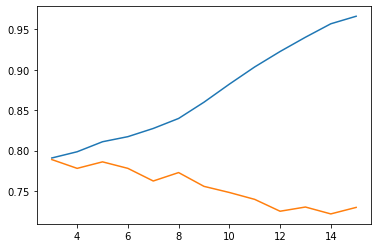

In [130]:
plt.plot(max_depths,Train_scores,label = "Training-Score")
plt.plot(max_depths,Test_scores,label = "Training-Score")
plt.show

### Plotting Decision Tree

[Text(1089.173076923077, 996.6, 'X[13] <= 0.5\nentropy = 0.835\nsamples = 4930\nvalue = [3622, 1308]'),
 Text(600.9230769230769, 815.4000000000001, 'X[12] <= 0.5\nentropy = 0.928\nsamples = 3735\nvalue = [2454, 1281]'),
 Text(300.46153846153845, 634.2, 'X[6] <= 0.5\nentropy = 0.986\nsamples = 2686\nvalue = [1529, 1157]'),
 Text(150.23076923076923, 453.0, 'X[1] <= 3.5\nentropy = 0.863\nsamples = 1188\nvalue = [849, 339]'),
 Text(75.11538461538461, 271.79999999999995, 'X[7] <= 0.5\nentropy = 0.995\nsamples = 408\nvalue = [221, 187]'),
 Text(37.55769230769231, 90.59999999999991, 'entropy = 0.988\nsamples = 250\nvalue = [109, 141]'),
 Text(112.67307692307692, 90.59999999999991, 'entropy = 0.87\nsamples = 158\nvalue = [112, 46]'),
 Text(225.34615384615384, 271.79999999999995, 'X[2] <= 29.475\nentropy = 0.712\nsamples = 780\nvalue = [628, 152]'),
 Text(187.78846153846155, 90.59999999999991, 'entropy = 0.466\nsamples = 232\nvalue = [209, 23]'),
 Text(262.90384615384613, 90.59999999999991, 'en

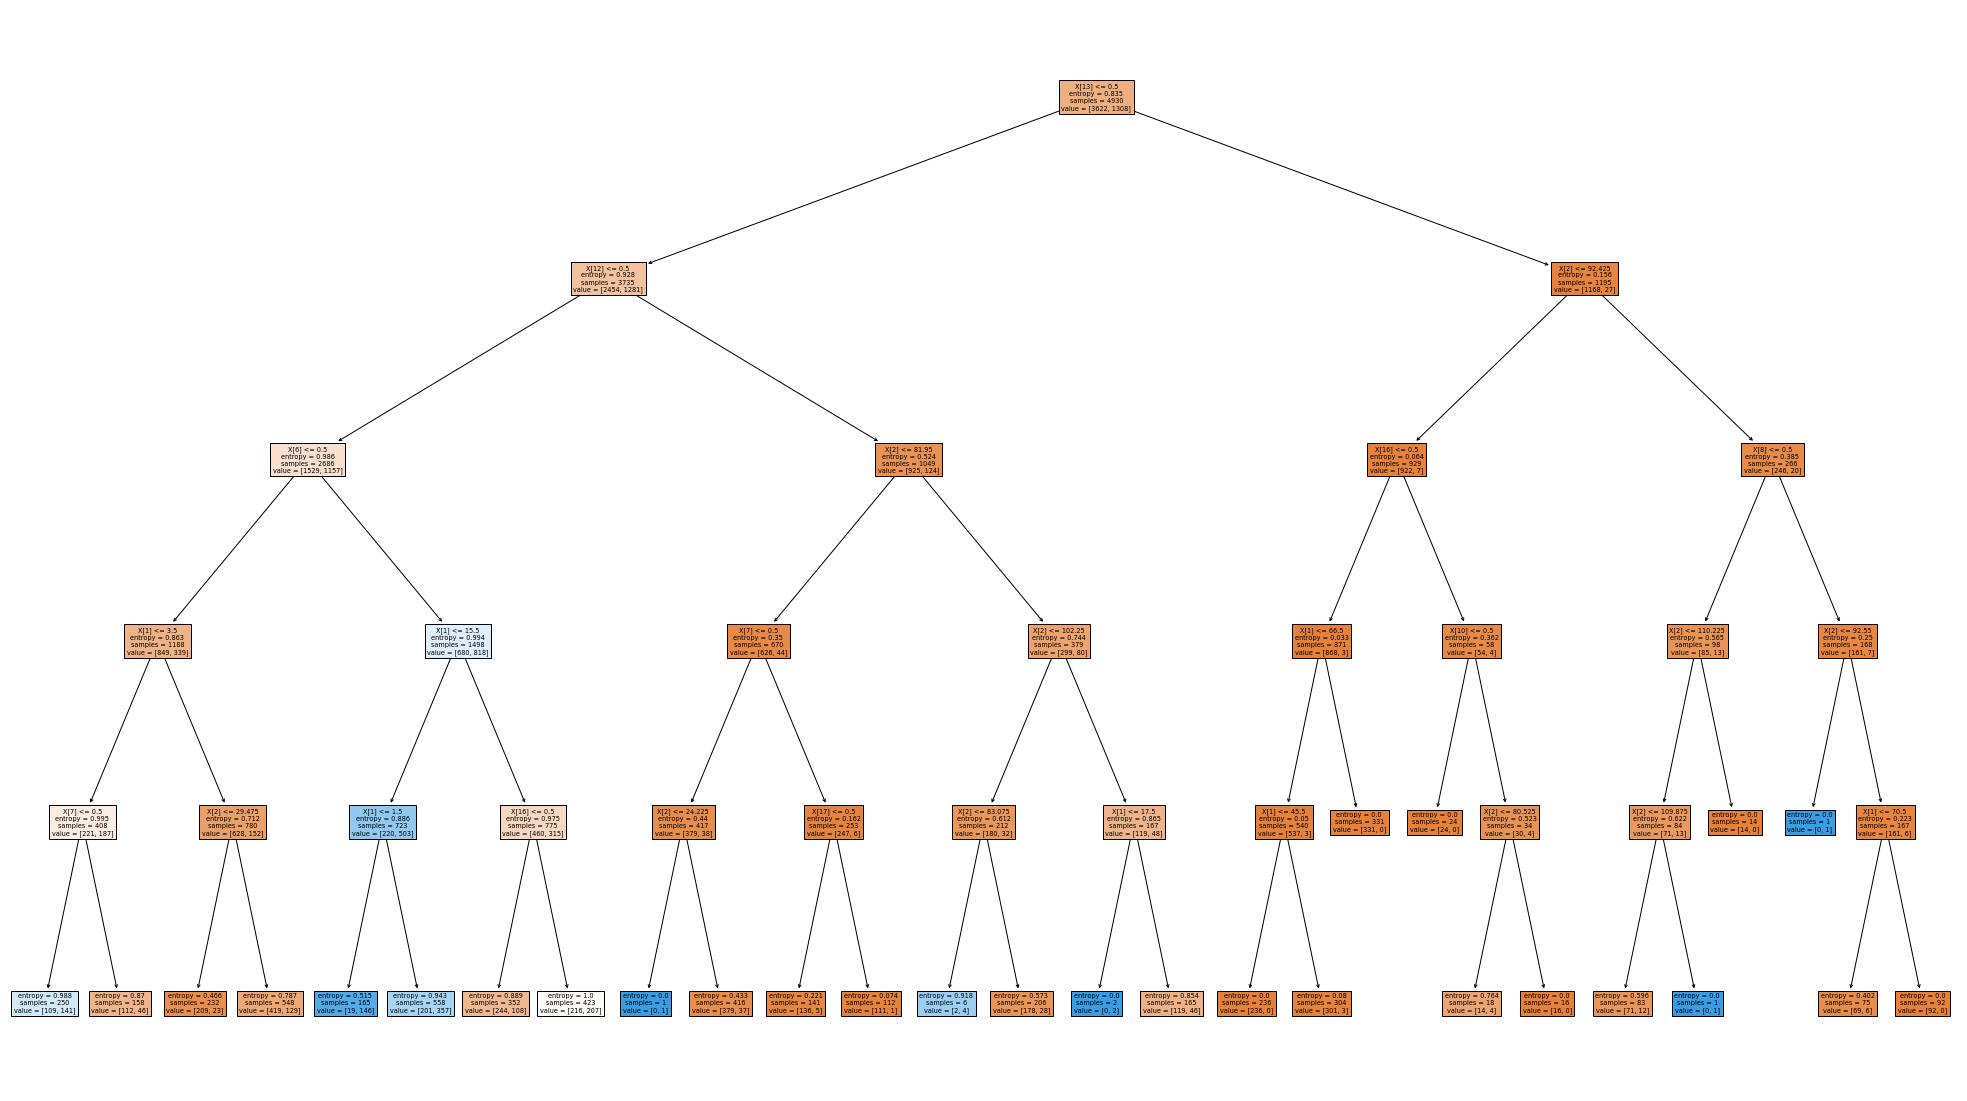

In [131]:
from sklearn import tree
plt.figure(figsize=(35,20))
tree.plot_tree(dtree_model,filled=True)

### Model 3 - Random Forest 

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
RandomF_model = RandomForestClassifier(n_estimators=25,random_state=21)

In [110]:
RandomF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=21)

In [111]:
RandomF_model.score(X_train,y_train)

0.9943204868154158

In [112]:
RandomF_model.score(X_test,y_test)

0.7893989588263133

In [113]:
Customer_churn_pred3 = dtree_model.predict(X_test)

### Hyperparametre Tuning of Random forest

In [114]:
# By varying n_estimators
train_scores = []
test_scores = []
n_estimator= [10,20,25,30,40,45,50,60,65,70]
for n in n_estimator :
    Rd_forest = RandomForestClassifier(n_estimators = n,random_state = 21)
    Rd_forest.fit(X_train,y_train)
    train_scores.append(Rd_forest.score(X_train,y_train))
    test_scores.append(Rd_forest.score(X_test,y_test))


<function matplotlib.pyplot.show(*args, **kw)>

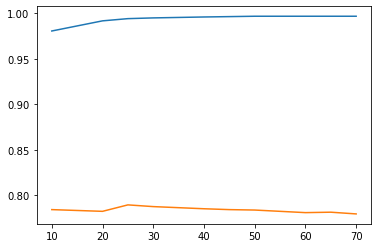

In [115]:
plt.plot(n_estimator,train_scores,label = "Training-Score")
plt.plot(n_estimator,test_scores,label = "Training-Score")
plt.show

### Measuring Accuracy , Precision & Recall Randon Forest Classifier Model

In [116]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [117]:
# Precision , Recall & F1_score
Classification_result = classification_report(y_test,Customer_churn_pred3)
print("Classification_result")
print(Classification_result)

Classification_result
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [118]:
# Calculating Accuracy
Accuracy = accuracy_score(y_test,Customer_churn_pred3)*100
print("Accuracy of Random Forest")
print(Accuracy)

Accuracy of Random Forest
78.60861334595361
